In [230]:
# Import dependancies
import json
import random
from citipy import citipy
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.stats as st

# Import API key
from config import weather_api_key

In [126]:
# generate random lat and long
city_df = pd.DataFrame({"Lat":np.random.uniform(-90,90,1400),"Lng":np.random.uniform(-180,180,1400)})
city_df.head()

,Lat,Lng
0,25.053295,-178.602956
1,-25.239147,70.669146
2,-61.578305,171.579034
3,-12.041669,174.972461
4,60.126675,4.489420


In [127]:
#  Generate Cities List
cities_name = []
countrycode = []
for x in range(0,len(city_df["Lat"])):
    lat = city_df.iloc[x]["Lat"]
    lng = city_df.iloc[x]["Lng"]
    city = citipy.nearest_city(lat,lng)
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)

city_df["City"] = cities_name
city_df["Country"] = countrycode
city_df.head()

,Lat,Lng,City,Country
0,25.053295,-178.602956,kapaa,us
1,-25.239147,70.669146,bambous virieux,mu
2,-61.578305,171.579034,bluff,nz
3,-12.041669,174.972461,asau,tv
4,60.126675,4.489420,solsvik,no


In [268]:
# remove duplicate cities
no_dup_cities = city_df.drop_duplicates("City", keep="first")
no_dup_cities = no_dup_cities.copy()
no_dup_cities


,Lat,Lng,City,Country
0,25.053295,-178.602956,kapaa,us
1,-25.239147,70.669146,bambous virieux,mu
2,-61.578305,171.579034,bluff,nz
3,-12.041669,174.972461,asau,tv
4,60.126675,4.489420,solsvik,no
...,...,...,...,...
1376,12.246556,-50.652057,iracoubo,gf
1381,8.254024,-60.697707,mabaruma,gy
1384,-3.490308,-79.677935,pinas,ec
1388,0.443528,69.951364,thinadhoo,mv


In [ ]:
#  url and json test
url = "http://api.openweathermap.org/data/2.5/weather?q=london&appid=77eb7fbda02ce8516e38146569387265"
response = requests.get(url).json()
response

In [271]:
# Create new columns for data from API to be inserted
no_dup_cities["Temperature"] = ""
no_dup_cities["Humidity"] = ""
no_dup_cities["Cloud cover"] = ""
no_dup_cities["Wind speed"] = ""
no_dup_cities["Date"] = ""
no_dup_cities.reset_index(drop=True)

,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date
0,25.053295,-178.602956,kapaa,us,,,,,
1,-25.239147,70.669146,bambous virieux,mu,,,,,
2,-61.578305,171.579034,bluff,nz,,,,,
3,-12.041669,174.972461,asau,tv,,,,,
4,60.126675,4.489420,solsvik,no,,,,,
...,...,...,...,...,...,...,...,...,...
586,12.246556,-50.652057,iracoubo,gf,,,,,
587,8.254024,-60.697707,mabaruma,gy,,,,,
588,-3.490308,-79.677935,pinas,ec,,,,,
589,0.443528,69.951364,thinadhoo,mv,,,,,


In [280]:
# loop through dataframe and call APIs
params = {
    "appid": weather_api_key,
    "units": "metric"
}

base_url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in no_dup_cities.iterrows():
    city_name = row["City"]

    params["q"] = city_name
    response = requests.get(base_url, params=params).json()
    
    try:
        print(f"Processing Record {index} of set 1 {city_name}")
        no_dup_cities.loc[index, "Temperature"] = response["main"]["temp_max"]
  
        print(f"Processing Record {index} of set 2 {city_name}")
        no_dup_cities.loc[index, "Humidity"] = response["main"]["humidity"]
  
        print(f"Processing Record {index} of set 3 {city_name}")
        no_dup_cities.loc[index, "Cloud cover"] = response["clouds"]["all"]
    
        print(f"Processing Record {index} of set 4 {city_name}")
        no_dup_cities.loc[index, "Wind speed"] = response["wind"]["speed"]
   
        no_dup_cities.loc[index, "Date"] = datetime.utcfromtimestamp(response["dt"]).strftime("%Y-%m-%d %H:%M:%S")
    except(KeyError, IndexError):
        print("Missing data ...... Skipping")

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name)

In [281]:
# clean dataframe and remove NaN
no_dup_cities.replace('', np.nan, inplace=True)
no_dup_cities.dropna(inplace=True)
no_dup_cities.head()


,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date


In [279]:
# Export the city data into a .csv.
no_dup_cities.to_csv("city_weather_1.csv", index=True)
# Display the DataFrame
no_dup_cities.head()


,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date


In [206]:
#  Inspect the data and remove the cities where the humidity > 100%.
no_dup_cities.describe()
# Skip this step if there are no cities that have humidity > 100%.

,Lat,Lng,Temperature,Humidity,Cloud cover,Wind speed
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,19.214570,16.526544,20.703848,71.749071,54.167286,3.372714
std,37.019063,94.291435,8.083965,20.460578,38.722066,2.591523
min,-88.483164,-179.873821,0.730000,11.000000,0.000000,0.000000
25%,-8.223508,-65.915885,14.572500,62.000000,15.000000,1.540000
50%,24.834146,21.870782,22.170000,77.000000,61.000000,2.570000
75%,48.414457,100.440831,26.957500,87.000000,95.000000,4.630000
max,89.530611,179.318907,39.500000,100.000000,100.000000,13.820000


Plotting the data

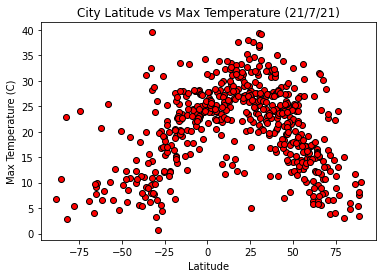

In [208]:
# Latitude vs. Temperature Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Max Temperature (21/7/21)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.show()

The code plots the latitude of a city and it's maximum temperature. Shows hotter temperatres closer to the equator.

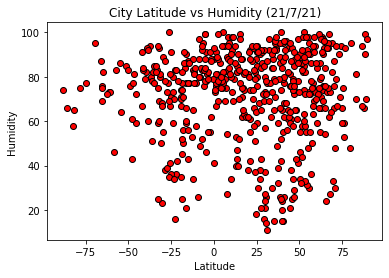

In [255]:
#  Latitude vs. Humidity Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Humidity (21/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

The code plots the latitude of a city and it's humidity level.

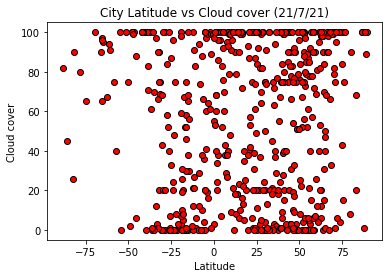

In [211]:
#  Latitude vs. Cloudiness Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Cloud cover (21/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

plt.show()

The code plots the latitude of a city and the level of cloud cover.

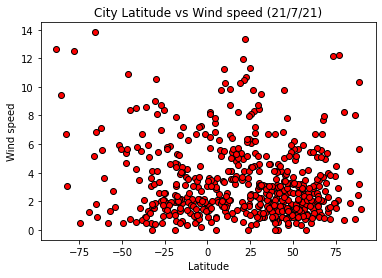

In [212]:
# Latitude vs. Wind Speed Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Wind speed (21/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

plt.show()

The code plots the latitude of a city and the wind speed.

Linear Regression

The r-value is: -0.6144029799923026


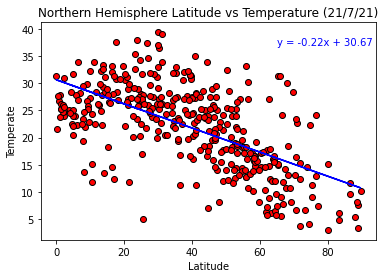

In [238]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Northern = no_dup_cities[no_dup_cities["Lat"]>0]

plt.scatter(Northern["Lat"], Northern["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Temperature (21/7/21)")
plt.ylabel("Temperate")
plt.xlabel("Latitude")
# linear regression
linear = st.linregress(Northern["Lat"], Northern["Temperature"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (65,37), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

The r-value is: 0.5666474110763893


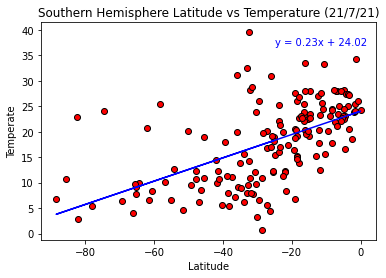

In [247]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Southern = no_dup_cities[no_dup_cities["Lat"]<0]

plt.scatter(Southern["Lat"], Southern["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Temperature (21/7/21)")
plt.ylabel("Temperate")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Temperature"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-25,37), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

There is a moderate to strong correlation of latitude and max temperatures. As the latitude gets closer to 0, the max temperatures will generally rise.

The r-value is: -0.009999503201623587


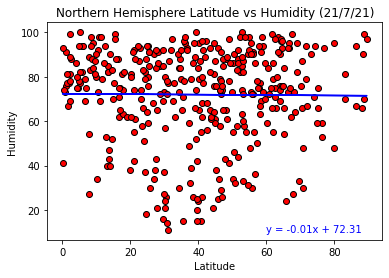

In [242]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Humidity (21/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Humidity"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (60,10), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

The r-value is: 0.010593240251291575


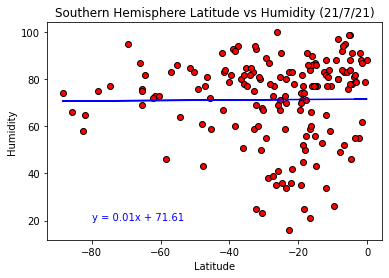

In [249]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Humidity (21/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Humidity"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-80,20), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

There is no correlation between humidity and latitude. The r-value is very low for both hemispheres.

The r-value is: 0.030711473339593995


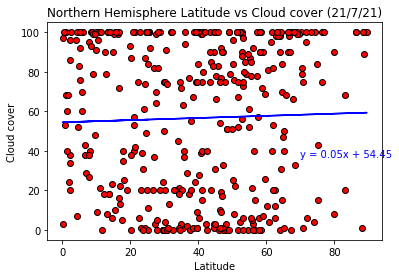

In [243]:
#  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Cloud cover (21/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Cloud cover"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (70,37), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

The r-value is: -0.28370759262190115


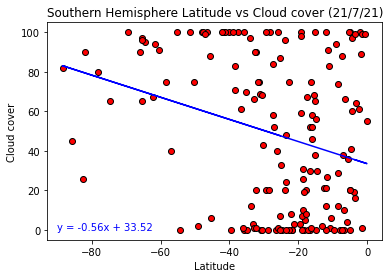

In [256]:
#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Cloud cover (21/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Cloud cover"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-90,0), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

There is no correlation between latitude and cloud cover.

The r-value is: -0.1479929469243599


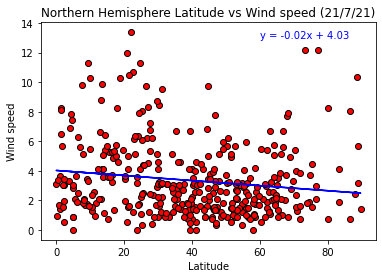

In [244]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Wind speed (21/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Wind speed"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (60,13), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

The r-value is: -0.33583545502625683


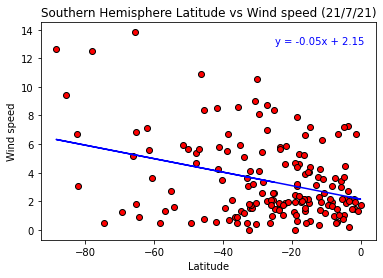

In [254]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Wind speed (21/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Wind speed"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-25,13), color="blue")

print(f"The r-value is: {linear[2]}")

plt.show()

There is a weak to no correlation between latitude and wind speed.